## Día 3.2
Referencias :
1.[TEQS](https://github.com/The-Eigensolvers/TEQS)
2.[Qiskit textbook](https://qiskit.org/textbook/ch-gates/multiple-qubits-entangled-states.html)

In [5]:
import numpy as np
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_bloch_multivector, plot_histogram

### Circuitos de más de un qubit 

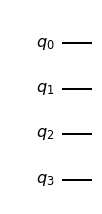

In [6]:
qc = QuantumCircuit(4)
qc.draw('mpl')

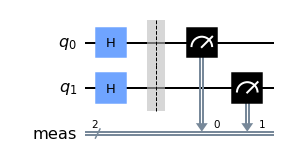

In [16]:
qc = QuantumCircuit(2) # Aplicar dos hadamards
qc.h(0)
qc.h(1)
qc.measure_all()
qc.draw('mpl')

In [19]:
sim = Aer.get_backend('aer_simulator') 
result = execute(qc,backend=sim,shots=2048).result()
cuentas = result.get_counts()

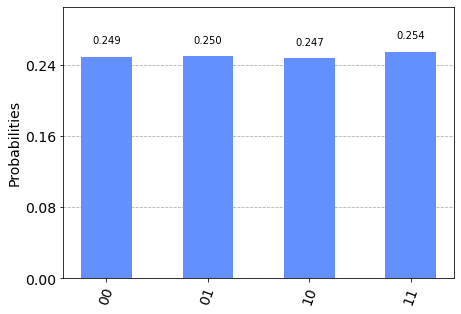

In [10]:
plot_histogram(cuentas)

### Convención
El qubit de menor "valor" va al final -> q2q1q0

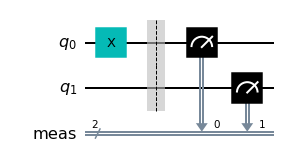

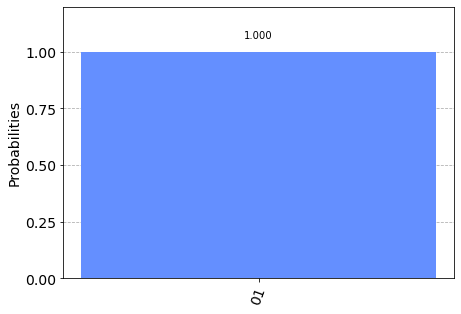

In [11]:
qc = QuantumCircuit(2)
qc.x(0)
qc.measure_all()

display(qc.draw('mpl'))

result = execute(qc,backend=sim,shots=1024).result()
plot_histogram(result.get_counts())

#### CNOT gate

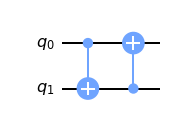

In [20]:
qc = QuantumCircuit(2)
qc.cx(0,1) # Control - Target
qc.cx(1,0)
qc.draw('mpl')

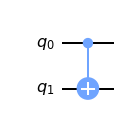

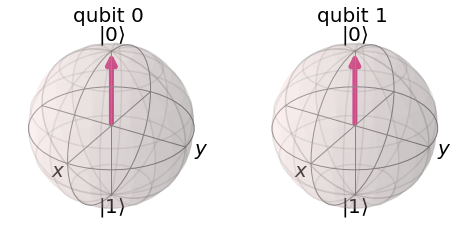

In [22]:
# Pintemos el estado después de una CNOT

val = False # Valor del control |1> cuando True

qc = QuantumCircuit(2)
if val == True:
    qc.x(0)

qc.cx(0,1)
display(qc.draw('mpl'))

res = execute(qc,backend=Aer.get_backend("statevector_simulator")).result()
plot_bloch_multivector(res.get_statevector())

### Creación de estados de Bell

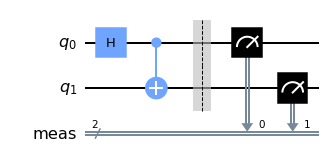

In [23]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.measure_all()
qc.draw('mpl')

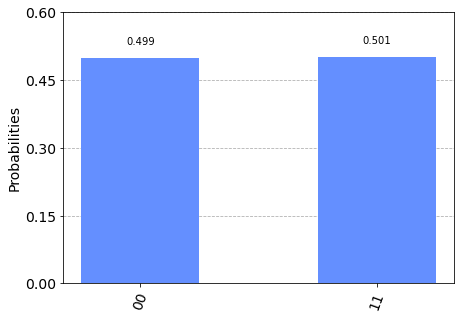

In [24]:
res = execute(qc,backend=sim,shots=1024).result()
plot_histogram(res.get_counts())

In [25]:
# RETO: Forma general, crear |Φ^ab>

def circuito_estado_bell(vals):
    qc = QuantumCircuit(2)
    if vals[0] == 1:
        qc.x(0)
    if vals[1] == 1:
        qc.x(1)
    qc.h(0)
    qc.cx(0,1)
    return qc

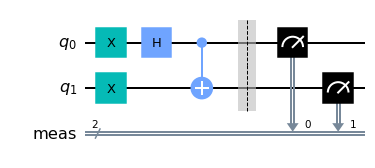

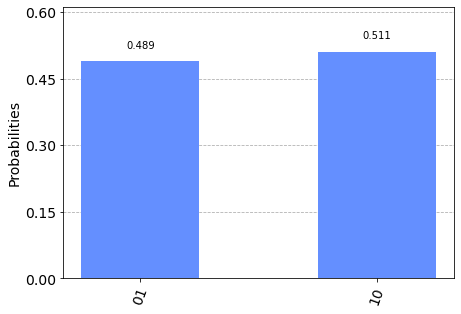

In [26]:
# Probando la función

qc = circuito_estado_bell([1,1])
qc.measure_all()
display(qc.draw('mpl'))
res = execute(qc,backend=sim,shots=1024).result()
plot_histogram(res.get_counts())

### Hardware real

In [31]:
from qiskit import IBMQ # Requiere cuenta

TOKEN = ""
IBMQ.enable_account(TOKEN)
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [33]:
provider = IBMQ.get_provider() # Aer era nuestro anterior provider
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

**Por un premio: Crear el primer estado de Bell en hardware real**

In [34]:
proc = provider.get_backend("ibmq_bogota")

In [35]:
job = execute(qc, backend=proc, shots=1024) 

from qiskit.tools.monitor import job_monitor
job_monitor(job) 

result = job.result()
result

Job Status: job has successfully run


account._job_result_object_storage:WARNING:2022-01-10 07:54:43,736: An error occurred while sending download completion acknowledgement: "HTTPSConnectionPool(host='api-qcon.quantum-computing.ibm.com', port=443): Read timed out. (read timeout=None)"


Result(backend_name='ibmq_bogota', backend_version='1.6.17', qobj_id='7c6299f0-cb62-430b-8d8b-9cbeed81a18f', job_id='61db6cab0a744a828b99c5f8', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 49, '0x1': 484, '0x2': 473, '0x3': 18}), header=QobjExperimentHeader(clbit_labels=[['meas', 0], ['meas', 1]], creg_sizes=[['meas', 2]], global_phase=5.497787143782138, memory_slots=2, metadata={}, n_qubits=5, name='circuit-401', qreg_sizes=[['q', 5]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4]]))], date=2022-01-10 07:28:34+08:00, status=Successful completion, status=QobjHeader(backend_name='ibmq_bogota', backend_version='1.6.17'), execution_id='d9560b1c-71a3-11ec-a0b7-b02628eaa3aa', time_taken=6.4819276332855225, error=None, client_version={'qiskit': '0.31.0'})

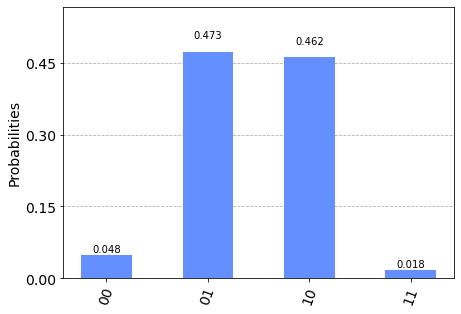

In [36]:
plot_histogram(result.get_counts())